In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx
import matplotlib.colors as mcolors
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.set_option('display.max_rows', None)  # To display all rows
# pd.set_option('display.max_columns', None)  # To display all columns
import glob as glob
import math
from datetime import datetime 
import seaborn as sns
import pingouin as pg


In [36]:
#load a4 and adni ml ready data csvs 
# adni = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/ADNI_ML_DATA.csv')
# a4 = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_ML_DATA.csv')

In [37]:
adni = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/adni_MMSE_29Apr2024.csv')
a4 = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_MMSE_PRV2_29Apr2024.csv')

In [38]:
print(a4.columns)

Index(['BID', 'VISCODE', 'DONE', 'NDREASON', 'WORDLIST', 'MMDATE', 'MMYEAR',
       'MMMONTH', 'MMDAY', 'MMSEASON', 'MMHOSPIT', 'MMFLOOR', 'MMCITY',
       'MMAREA', 'MMSTATE', 'MMBALL', 'MMFLAG', 'MMTREE', 'MMTRIALS', 'MMDLTR',
       'MMLLTR', 'MMRLTR', 'MMOLTR', 'MMWLTR', 'MMWORLD', 'MMBALLDL',
       'MMFLAGDL', 'MMTREEDL', 'MMWATCH', 'MMPENCIL', 'MMREPEAT', 'MMHAND',
       'MMFOLD', 'MMONFLR', 'MMREAD', 'MMWRITE', 'MMDRAW', 'MMSCORE',
       'update_stamp'],
      dtype='object')


In [39]:
adni.drop(columns=['ID'],inplace=True)
print(adni.columns)

Index(['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'DONE',
       'NDREASON', 'SOURCE', 'DATE', 'MMDATE', 'MMYEAR', 'MMMONTH', 'MMDAY',
       'MMSEASON', 'MMHOSPIT', 'MMFLOOR', 'MMCITY', 'MMAREA', 'MMSTATE',
       'WORDLIST', 'WORD1', 'WORD2', 'WORD3', 'MMTRIALS', 'MMD', 'MML', 'MMR',
       'MMO', 'MMW', 'MMLTR1', 'MMLTR2', 'MMLTR3', 'MMLTR4', 'MMLTR5',
       'MMLTR6', 'MMLTR7', 'WORLDSCORE', 'WORD1DL', 'WORD2DL', 'WORD3DL',
       'MMWATCH', 'MMPENCIL', 'MMREPEAT', 'MMHAND', 'MMFOLD', 'MMONFLR',
       'MMREAD', 'MMWRITE', 'MMDRAW', 'MMSCORE', 'SITEID', 'USERDATE',
       'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR',
       'update_stamp'],
      dtype='object')


In [40]:
#rename ID RID
a4.rename(columns={'BID': 'RID'}, inplace=True)

In [41]:
a4 = a4[['RID','MMSCORE']]
adni = adni[['RID','MMSCORE']]

In [42]:
print(adni)

         RID  MMSCORE
0          2     28.0
1          1     28.0
2          3     20.0
3          4     27.0
4          5     29.0
...      ...      ...
13249   6704     29.0
13250  10111     27.0
13251   5167     30.0
13252   6903     29.0
13253   6621     28.0

[13254 rows x 2 columns]


In [43]:
#scrape MMSE col from both and adni to demo data csv 
adni_demo = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/ADNI/adni_filtered_demo.csv')
a4_demo = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')

In [44]:
print(adni)

         RID  MMSCORE
0          2     28.0
1          1     28.0
2          3     20.0
3          4     27.0
4          5     29.0
...      ...      ...
13249   6704     29.0
13250  10111     27.0
13251   5167     30.0
13252   6903     29.0
13253   6621     28.0

[13254 rows x 2 columns]


In [45]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472       2.0  78.25         2      19.0      5   1
1    B10693248       2.0  65.94         2      16.0      5   1
2    B10709603       1.0  74.15         2      18.0      5   1
3    B10795731       1.0  69.23         2      18.0      5   1
4    B10904689       2.0  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373       2.0  67.00         2      20.0      5   1
369  B99649691       2.0  65.31         2      16.0      5   1
370  B99696480       2.0  74.41         2      12.0      5   1
371  B99860801       1.0  71.56         2      18.0      2   1
372  B99870985       1.0  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [46]:
# adni_mmse = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_MMSE_PRV2_29Apr2024.csv')
# a4_mmse = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/adni_MMSE_29Apr2024.csv')

filter only matching RODs 

In [47]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472       2.0  78.25         2      19.0      5   1
1    B10693248       2.0  65.94         2      16.0      5   1
2    B10709603       1.0  74.15         2      18.0      5   1
3    B10795731       1.0  69.23         2      18.0      5   1
4    B10904689       2.0  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373       2.0  67.00         2      20.0      5   1
369  B99649691       2.0  65.31         2      16.0      5   1
370  B99696480       2.0  74.41         2      12.0      5   1
371  B99860801       1.0  71.56         2      18.0      2   1
372  B99870985       1.0  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [48]:
#check for 31 
is_present = 10423472 in a4['RID'].values
print(is_present)

False


In [49]:
print(a4)

            RID  MMSCORE
0     B10018169     27.0
1     B10021023     30.0
2     B10048838     30.0
3     B10081264     29.0
4     B10082310     30.0
...         ...      ...
6769  B99957366     26.0
6770  B99968206     30.0
6771  B99971727     29.0
6772  B99980935     29.0
6773  B99987993     29.0

[6774 rows x 2 columns]


In [50]:
# Merge a4_demo with a4 on 'RID' column
a4_mmse_filtered = a4_demo.merge(a4[['RID', 'MMSCORE']], on='RID', how='inner')

# Print the resulting DataFrame
print(a4_mmse_filtered)


           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX  MMSCORE
0    B10423472       2.0  78.25         2      19.0      5   1     29.0
1    B10693248       2.0  65.94         2      16.0      5   1     29.0
2    B10709603       1.0  74.15         2      18.0      5   1     30.0
3    B10795731       1.0  69.23         2      18.0      5   1     28.0
4    B10904689       2.0  68.21         2      13.0      5   1     28.0
..         ...       ...    ...       ...       ...    ...  ..      ...
368  B99525373       2.0  67.00         2      20.0      5   1     28.0
369  B99649691       2.0  65.31         2      16.0      5   1     28.0
370  B99696480       2.0  74.41         2      12.0      5   1     25.0
371  B99860801       1.0  71.56         2      18.0      2   1     27.0
372  B99870985       1.0  71.32         2      14.0      5   1     26.0

[373 rows x 8 columns]


In [51]:
# Merge a4_demo with a4 on 'RID' column
adni_mmse_filtered = adni_demo.merge(adni[['RID', 'MMSCORE']], on='RID', how='inner')

In [52]:
#function to filter the latest visit of a df 
def filter_latest_visit(df):
    last_visit_df = df.groupby('RID').tail(1) #get the last occurance of that RID value 
    last_visit_df = last_visit_df.reset_index(drop=True)
    return last_visit_df

In [53]:
adni_mmse_filtered = filter_latest_visit(adni_mmse_filtered)
print(adni_mmse_filtered)

      RID  PTGENDER      PTAGE  PTETHNIC  PTEDUCAT  PTRACE  DX  MMSCORE
0      31       2.0  83.750000       2.0      18.0       5   2      NaN
1     112       1.0  76.666667       2.0      18.0       5   1     20.0
2     120       1.0  79.083333       2.0      20.0       5   2     29.0
3     210       2.0  78.500000       2.0      13.0       5   2     29.0
4     377       1.0  85.166667       2.0      16.0       5   2     30.0
..    ...       ...        ...       ...       ...     ...  ..      ...
393  7054       2.0  72.250000       2.0      18.0       5   2     27.0
394  7079       2.0  86.750000       2.0      18.0       4   1     27.0
395  7088       1.0  70.000000       2.0      16.0       5   1     25.0
396  7100       1.0  74.000000       2.0      16.0       4   3      NaN
397  7105       1.0  77.500000       1.0      18.0       6   2     24.0

[398 rows x 8 columns]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the boxplot for adni_cent_merge
sns.boxplot(data=adni_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[0])
axes[0].set_xlabel('Amyloid Quantile')
axes[0].set_ylabel('MMSE Score')
axes[0].set_title('ADNI')

# Plot the boxplot for a4_cent_merge
sns.boxplot(data=a4_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Amyloid Quantile')
axes[1].set_ylabel('MMSE Score')
axes[1].set_title('A4')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

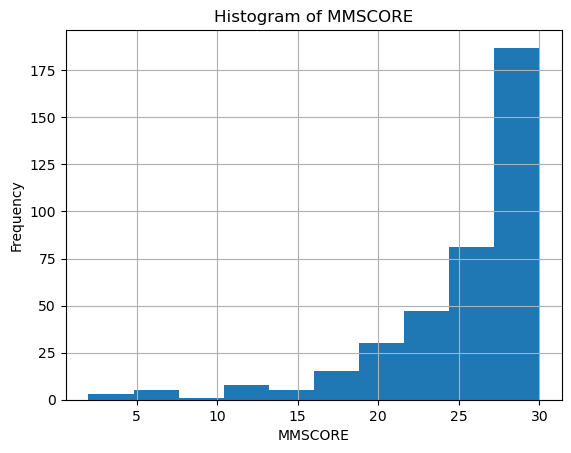

In [54]:
#histogram of mmse scores 
# Plot histogram of the MMSCORE column
adni_mmse_filtered['MMSCORE'].hist()

# Add labels and title
plt.xlabel('MMSCORE')
plt.ylabel('Frequency')
plt.title('Histogram of MMSCORE')

# Show the plot
plt.show()

In [60]:
#boxplot of MMSE in 3 CL groups 
adni_cent = pd.read_csv('../data/intermediate_data/adni/merged_adni_at_amy_pos_novol.csv')
a4_cent = pd.read_csv('../data/intermediate_data/a4/merged_a4_at_amypos_novol.csv')
a4_cent=a4_cent.rename(columns={'centiloid':'CENTILOIDS','BID':'RID'})

In [59]:
a4_cent

,Unnamed: 0,BID,ligand,centiloid,Mean_Brain_Stem,Mean_CC_Anterior,Mean_CC_Central,Mean_CC_Mid_Anterior,Mean_CC_Mid_Posterior,Mean_CC_Posterior,...,bi_precentral,bi_precuneus,bi_rostralanteriorcingulate,bi_rostralmiddlefrontal,bi_superiorfrontal,bi_superiorparietal,bi_superiortemporal,bi_supramarginal,bi_temporalpole,bi_transversetemporal
0,0,B10423472,Florbetapir,80.8687,0.911925,0.857168,0.733042,0.748900,0.663917,0.866686,...,0.955041,1.079061,1.170967,1.084401,1.046561,0.904519,1.056903,0.986939,1.098317,0.949163
1,1,B10693248,Florbetapir,113.8210,1.000662,0.908223,0.862122,0.873952,0.837348,0.964523,...,0.958097,1.114343,1.062407,1.174429,0.979405,0.958415,1.093653,1.146316,1.118879,1.065898
2,2,B10709603,Florbetapir,40.5933,1.007361,0.853996,0.872356,0.826985,0.782240,0.966260,...,0.920471,1.039841,1.029535,0.987615,0.897984,0.900524,1.055535,1.035770,1.069306,0.981632
3,3,B10904689,Florbetapir,126.6360,0.920387,0.971428,0.823842,0.924871,0.792009,0.918345,...,0.912223,1.217753,1.065679,0.993498,1.011460,1.141170,1.077074,1.141837,1.087700,0.963342
4,4,B11089276,Florbetapir,35.1012,1.035534,0.875824,0.751278,0.736648,0.804294,0.880089,...,1.049212,1.160123,1.158528,1.085493,1.048737,1.015478,1.092743,1.098332,1.040324,1.066399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,B92372599,Florbetapir,40.5933,0.919593,0.696205,0.754464,0.687262,0.620278,0.825615,...,1.008765,1.071886,0.928695,1.095746,0.997771,1.130347,1.037639,1.122645,1.031807,0.859354
369,369,B97841288,Florbetapir,71.7152,0.837669,0.714328,0.892816,0.857996,0.848363,1.179848,...,1.006039,1.321353,1.060927,1.168246,1.151136,1.190718,1.055261,1.113416,1.074650,0.891608
370,370,B98032541,Florbetapir,55.2389,1.046703,0.694822,0.912663,0.761793,0.785953,0.889976,...,1.061295,1.384344,1.041259,1.635588,1.237379,1.178553,1.106055,1.319375,1.063425,0.829076
371,371,B99033399,Florbetapir,53.4082,0.940477,0.921984,0.862013,0.859376,0.818269,0.932453,...,0.958616,1.109726,1.063435,0.921026,0.994262,0.962612,1.016614,1.041210,1.010308,1.067383


In [56]:
adni_cent

,Unnamed: 0,RID,TRACER_x,CENTILOIDS,LONIUID,SITEID,PTID,SCANDATE,PROCESSDATE,TRACER_y,...,RIGHT_CEREBELLUM_CORTEX_SUVR,RIGHT_CEREBELLUM_WHITE_MATTER_SUVR,RIGHT_CEREBRAL_WHITE_MATTER_SUVR,RIGHT_CHOROID_PLEXUS_SUVR,RIGHT_HIPPOCAMPUS_SUVR,RIGHT_PALLIDUM_SUVR,RIGHT_PUTAMEN_SUVR,RIGHT_THALAMUS_PROPER_SUVR,RIGHT_VENTRALDC_SUVR,update_stamp
0,0,31,FBP,97.0,I1596172,23,023-S-0031,2019-04-23,2022-09-02,FTP,...,1.050,1.029,1.097,4.989,1.502,1.714,1.496,1.112,1.538,2023-07-25 09:32:18.0
1,1,112,FBP,89.0,I1600753,127,127-S-0112,2018-08-13,2022-09-02,FTP,...,1.042,1.195,1.346,1.631,1.618,1.794,1.932,1.430,1.475,2023-07-25 09:32:18.0
2,2,120,FBP,32.0,I1596585,27,027-S-0120,2017-09-13,2022-09-02,FTP,...,1.005,1.047,1.137,6.378,1.150,1.431,1.522,1.213,1.263,2023-07-25 09:32:18.0
3,3,210,FBP,54.0,I1599039,68,068-S-0210,2018-03-13,2022-09-02,FTP,...,0.980,1.013,1.080,3.649,1.128,1.771,1.399,1.201,1.385,2023-07-25 09:32:18.0
4,4,377,FBP,85.0,I1598072,37,037-S-0377,2019-06-05,2022-09-02,FTP,...,1.030,1.206,1.220,4.129,1.347,2.277,2.023,1.523,1.668,2023-07-25 09:32:18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,393,6580,FBB,142.0,I1603427,941,941-S-6580,2020-10-09,2022-11-18,FTP,...,0.978,1.040,1.065,3.945,1.263,1.685,1.698,1.241,1.356,2023-07-25 09:32:18.0
394,394,6581,FBB,28.0,I1603410,941,941-S-6581,2018-09-21,2022-09-02,FTP,...,0.988,1.105,1.095,5.059,1.220,2.001,1.651,1.171,1.372,2023-07-25 09:32:18.0
395,395,6586,FBB,40.0,I1638643,135,135-S-6586,2022-10-26,2023-03-14,FTP,...,1.016,0.958,1.003,1.728,0.989,1.752,1.799,0.994,1.313,2023-07-25 09:32:18.0
396,396,7100,FBB,50.0,I1634248,33,033-S-7100,2022-10-19,2023-02-15,FTP,...,1.031,1.028,1.001,6.548,1.279,1.327,1.232,1.056,1.298,2023-07-25 09:32:18.0


In [62]:
adni_cent_merge = adni_mmse_filtered.merge(adni_cent[['RID', 'CENTILOIDS']], on='RID', how='inner')
a4_cent_merge = a4_mmse_filtered.merge(a4_cent[['RID', 'CENTILOIDS']], on='RID', how='inner')

In [ ]:
a4_cent_merge

,RID,PTGENDER,PTAGE,PTETHNIC,PTEDUCAT,PTRACE,DX,MMSCORE,CENTILOIDS
0,31,2.0,83.750000,2.0,18.0,5,2,NaN,97.0
1,112,1.0,76.666667,2.0,18.0,5,1,20.0,89.0
2,120,1.0,79.083333,2.0,20.0,5,2,29.0,32.0
3,210,2.0,78.500000,2.0,13.0,5,2,29.0,54.0
4,377,1.0,85.166667,2.0,16.0,5,2,30.0,85.0
...,...,...,...,...,...,...,...,...,...
393,7054,2.0,72.250000,2.0,18.0,5,2,27.0,75.0
394,7079,2.0,86.750000,2.0,18.0,4,1,27.0,39.0
395,7088,1.0,70.000000,2.0,16.0,5,1,25.0,108.0
396,7100,1.0,74.000000,2.0,16.0,4,3,NaN,50.0


In [63]:
#qcut 
#labels the quartiles, pandas category type 
#to save 
adni_cent_merge['quantile'] = pd.qcut(adni_cent_merge['CENTILOIDS'],3,labels=False)
a4_cent_merge['quantile'] = pd.qcut(a4_cent_merge['CENTILOIDS'],3,labels=False)


In [79]:
# Count the number of rows in each quantile group for adni_cent_merge
adni_quantile_counts = adni_cent_merge['quantile'].value_counts().sort_index()
print("ADNI Quantile Counts:")
print(adni_quantile_counts)

# Count the number of rows in each quantile group for a4_cent_merge
a4_quantile_counts = a4_cent_merge['quantile'].value_counts().sort_index()
print("\nA4 Quantile Counts:")
print(a4_quantile_counts)


ADNI Quantile Counts:
quantile
0    139
1    129
2    130
Name: count, dtype: int64

A4 Quantile Counts:
quantile
0    130
1    119
2    124
Name: count, dtype: int64


In [104]:
adni_cent_merge

,RID,PTGENDER,PTAGE,PTETHNIC,PTEDUCAT,PTRACE,DX,MMSCORE,CENTILOIDS,quantile
0,31,2.0,83.750000,2.0,18.0,5,2,NaN,97.0,2
1,112,1.0,76.666667,2.0,18.0,5,1,20.0,89.0,1
2,120,1.0,79.083333,2.0,20.0,5,2,29.0,32.0,0
3,210,2.0,78.500000,2.0,13.0,5,2,29.0,54.0,0
4,377,1.0,85.166667,2.0,16.0,5,2,30.0,85.0,1
...,...,...,...,...,...,...,...,...,...,...
393,7054,2.0,72.250000,2.0,18.0,5,2,27.0,75.0,1
394,7079,2.0,86.750000,2.0,18.0,4,1,27.0,39.0,0
395,7088,1.0,70.000000,2.0,16.0,5,1,25.0,108.0,2
396,7100,1.0,74.000000,2.0,16.0,4,3,NaN,50.0,0


In [106]:
# Group by the 'quartile' column and calculate the mean of the 'MMSCORE' column
mean_mmse_by_quantile = adni_cent_merge.groupby('quantile')['MMSCORE'].mean()

# Print the result
print(mean_mmse_by_quantile)


quantile
0    27.684211
1    24.865079
2    23.845528
Name: MMSCORE, dtype: float64


In [65]:
#number of 
print(len(adni_cent_merge[adni_cent_merge['quantile']==2]))

130


In [112]:
# Perform ANOVA
anova_result_adni = pg.anova(data=adni_cent_merge, dv='MMSCORE', between='quantile')



In [113]:
anova_result_adni

,Source,ddof1,ddof2,F,p-unc,np2
0,quantile,2,379,20.026161,5.398791e-09,0.095578


In [114]:
#bonferroni 
alpha = .05
num_comparisons = 3
adjusted_p = anova_result_adni['p-unc'] * num_comparisons
print(adjusted_p)


0    1.619637e-08
Name: p-unc, dtype: float64


In [66]:
#anova pingouin 
# Perform ANOVA
anova_result_adni = pg.anova(data=adni_cent_merge, dv='MMSCORE', between='quantile')
print(anova_result_adni)
#they are significantly different, moderate  

     Source  ddof1  ddof2          F         p-unc       np2
0  quantile      2    379  20.026161  5.398791e-09  0.095578


In [ ]:
#mean mmse for each quartile 
adni_cent_merge

In [67]:
anova_result_a4 = pg.anova(data=a4_cent_merge, dv='MMSCORE', between='quantile')
print(anova_result_a4)

     Source  ddof1  ddof2         F     p-unc       np2
0  quantile      2    370  1.485169  0.227811  0.007964


/tmp/ipykernel_3724209/2299881313.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adni_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[0])
/tmp/ipykernel_3724209/2299881313.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a4_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[1])


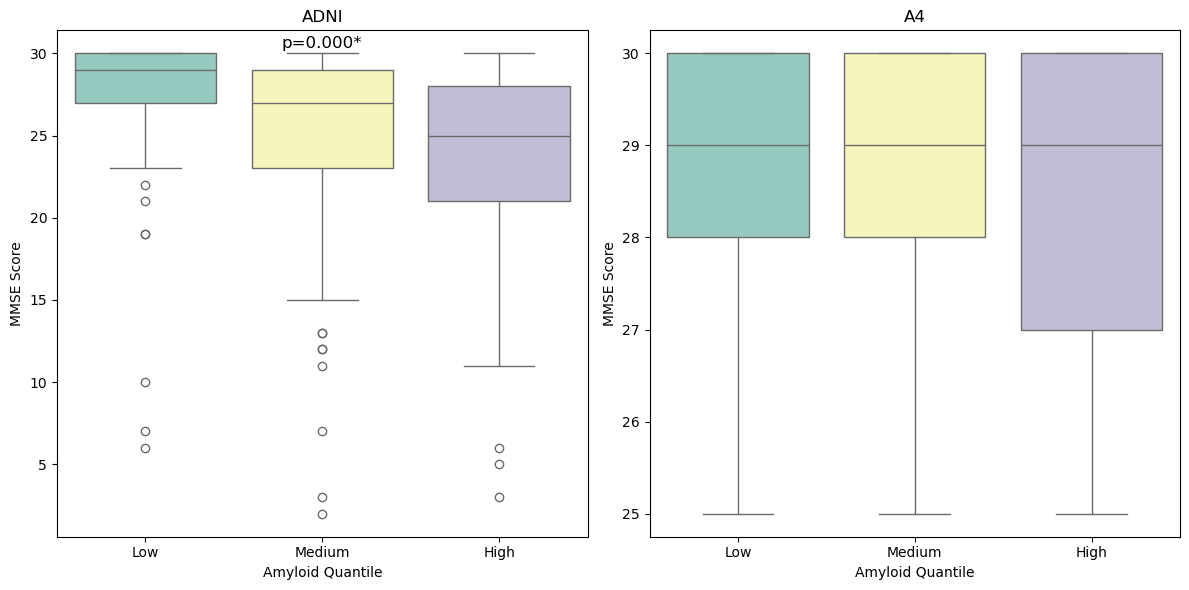

In [102]:
import pingouin as pg

# Perform ANOVA for ADNI
anova_result_adni = pg.anova(data=adni_cent_merge, dv='MMSCORE', between='quantile')
adni_pval = anova_result_adni['p-unc'].values[0]

# Perform ANOVA for A4
anova_result_a4 = pg.anova(data=a4_cent_merge, dv='MMSCORE', between='quantile')
a4_pval = anova_result_a4['p-unc'].values[0]

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ADNI plot
sns.boxplot(data=adni_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[0])
axes[0].set_xlabel('Amyloid Quantile')
axes[0].set_ylabel('MMSE Score')
axes[0].set_title('ADNI')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Low', 'Medium', 'High'])
if adni_pval < 0.05:
    axes[0].annotate(f'p={adni_pval:.3f}*', xy=(0.5, .965), xycoords='axes fraction', ha='center', fontsize=12)

# A4 plot
sns.boxplot(data=a4_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Amyloid Quantile')
axes[1].set_ylabel('MMSE Score')
axes[1].set_title('A4')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Low', 'Medium', 'High']) 
if a4_pval < 0.05:
    axes[1].annotate(f'p={a4_pval:.3f}*', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


/tmp/ipykernel_3724209/1513900509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adni_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[0])
/tmp/ipykernel_3724209/1513900509.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Low', 'Medium', 'High'])  # Set x-axis tick labels
/tmp/ipykernel_3724209/1513900509.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a4_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[1])
/tmp/ipykernel_3724209/1513900509.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

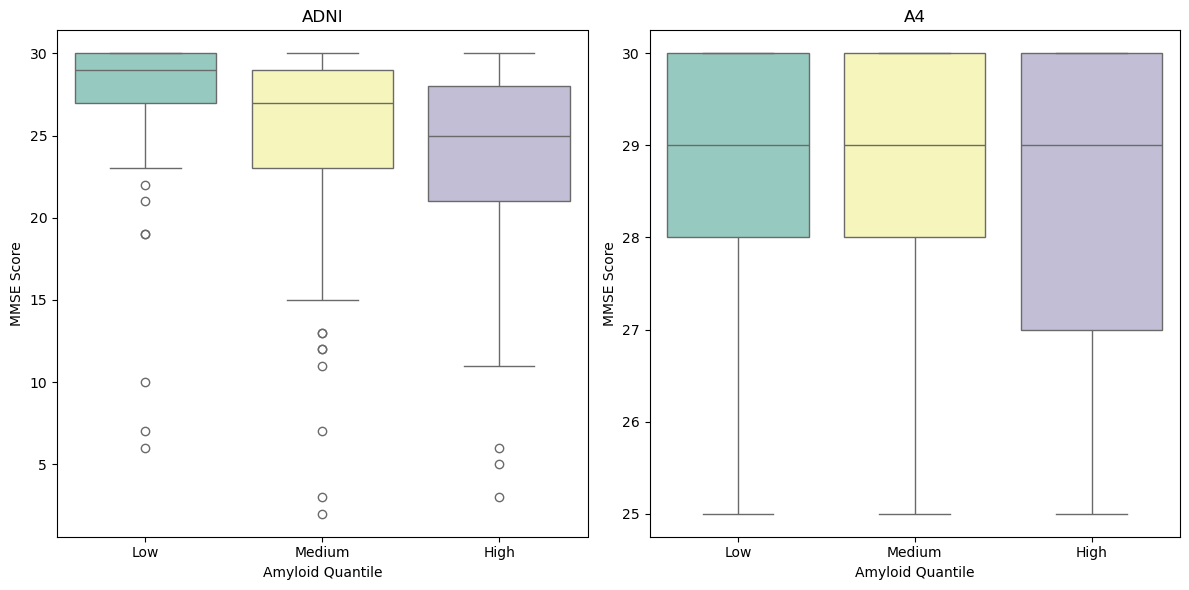

In [69]:
#side by side 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#adni
sns.boxplot(data=adni_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[0])
axes[0].set_xlabel('Amyloid Quantile')
axes[0].set_ylabel('MMSE Score')
axes[0].set_title('ADNI')
axes[0].set_xticklabels(['Low', 'Medium', 'High'])

#a4
sns.boxplot(data=a4_cent_merge, x='quantile', y='MMSCORE', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Amyloid Quantile')
axes[1].set_ylabel('MMSE Score')
axes[1].set_title('A4')
axes[1].set_xticklabels(['Low', 'Medium', 'High']) 
plt.tight_layout()
plt.show()


/tmp/ipykernel_3724209/1785911939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(adni_cent_merge,x='quantile',y='PTAGE',palette='Set2')


Text(0.5, 1.0, 'Age Across ADNI Amyloid Quantiles')

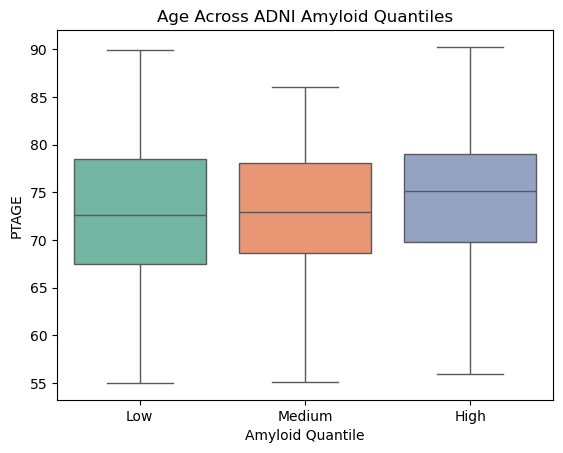

In [78]:
#boxplot of age in the three groups 
sns.boxplot(adni_cent_merge,x='quantile',y='PTAGE',palette='Set2')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.xlabel("Amyloid Quantile")
plt.title("Age Across ADNI Amyloid Quantiles")

/tmp/ipykernel_3724209/89266956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(a4_cent_merge,x='quantile',y='PTAGE',palette='Set2')


Text(0.5, 1.0, 'Age Across A4 Amyloid Quantiles')

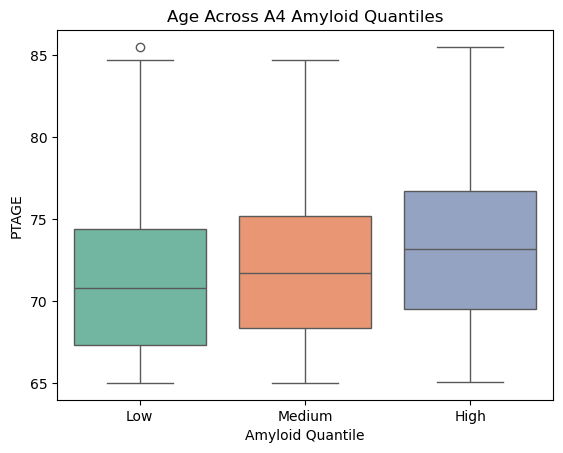

In [103]:
#boxplot of age in the three groups 
sns.boxplot(a4_cent_merge,x='quantile',y='PTAGE',palette='Set2')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.xlabel("Amyloid Quantile")
plt.title("Age Across A4 Amyloid Quantiles")

371 out of 373 a4 have mmse score and 332 out of 398 adni have mmse score availible 

In [ ]:
adni_mmse_filtered.to_csv('../data/demographic_csvs/ADNI/adni_filtered_mmse.csv')
a4_mmse_filtered.to_csv('../data/demographic_csvs/A4/a4_filtered_mmse.csv')